In [19]:
import os
import google.generativeai as genai
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

def email_analyzer(txt):
  api_key = os.getenv("GENAI_API_KEY")
  genai.configure(api_key=api_key)
  # Create the model
  generation_config = {
      "temperature": 0.1,
      "top_p": 0.95,
      "top_k": 40,
      "max_output_tokens": 100,
      "response_mime_type": "text/plain",
      }
  model = genai.GenerativeModel(
      model_name="tunedModels/finetunedata-kqn02hc20o4y",
      generation_config=generation_config,
      )
  chat_session = model.start_chat(
      history=[

      ]
      )
  response = chat_session.send_message(txt)
  return response.text


In [21]:
eval_df = pd.read_csv('eval_data.csv')

In [22]:
eval_df.head()

,Email,Label
0,Are you safe from Duo?\n \nDid you learn enoug...,neutral informal
1,"GM Crypto Fam,\n \nBig things are happening in...",positive informal
2,"Welcome to dbdiagram.io, a free tool that help...",neutral formal
3,"Hi there,\n\nI'm afraid I have some bad news —...",negative informal
4,New years provide new opportunities for growth...,positive informal


In [23]:
eval_df['Analyzed_label'] =  eval_df['Email'].apply(email_analyzer)

In [24]:
# Generate classification report as a dictionary
report = classification_report(eval_df['Label'], eval_df['Analyzed_label'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Print DataFrame to verify
print(report_df)

                   precision    recall  f1-score    support
negative informal   1.000000  0.750000  0.857143   4.000000
neutral formal      1.000000  0.800000  0.888889   5.000000
neutral informal    0.500000  1.000000  0.666667   1.000000
positive formal     1.000000  1.000000  1.000000   1.000000
positive informal   0.800000  1.000000  0.888889   4.000000
accuracy            0.866667  0.866667  0.866667   0.866667
macro avg           0.860000  0.910000  0.860317  15.000000
weighted avg        0.913333  0.866667  0.873016  15.000000


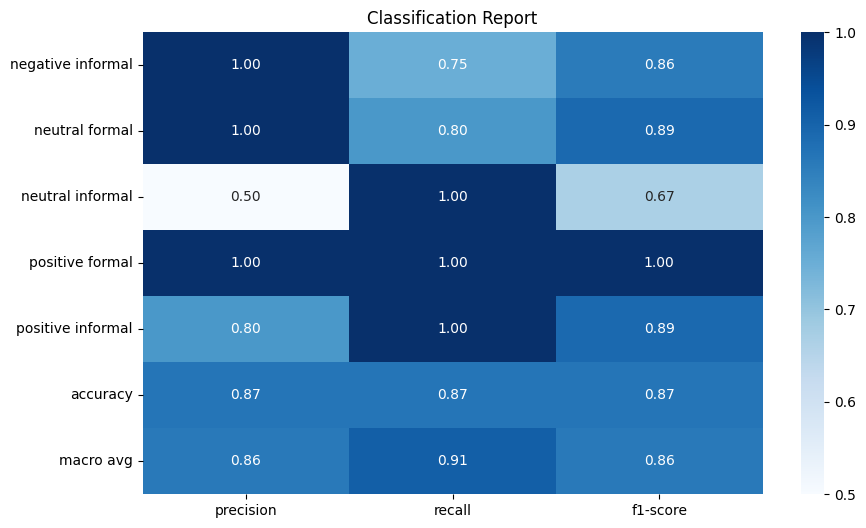

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.show()

In [26]:
eval_df_with_pred = eval_df.copy()

In [27]:
eval_df_with_pred.to_csv('eval_df_with_pred.csv')